In [ ]:
import pandas as pd
import numpy as np
from pandas import ExcelFile
from pandas import ExcelWriter
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## 1.a
### importing data 
df =  pd.read_excel('Documents/552/assignments/Homework_2/powerplant.xlsx',sheet_name="Sheet1")


In [243]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [244]:
#1.(b).i

rows, columns=df.shape
print("Number of rows:", rows)
print("Numebr of columns:", columns)

print("Column headings:")
print(df.columns)

Number of rows: 9568
Numebr of columns: 5
Column headings:
Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')


In [245]:
## renaming columns for better understanding

df.columns =["Temperature", "Vacuum", "Pressure", "Humidity" , "Energy_Output"]
print("Column headings:")
print(df.columns)

Column headings:
Index(['Temperature', 'Vacuum', 'Pressure', 'Humidity', 'Energy_Output'], dtype='object')


There are 9568 rows and 5 columns in the given dataset.
The columns represent - Ambient Temperature (AT), Exhaust Vacuum (V), Ambient Pressure (AP), Relative Humidity (RH), Energy Output(PE).
The rows represent the corresponding values of above-mentioned columns for a Combined Cycle Power Plant over 6 years (2006-2011)

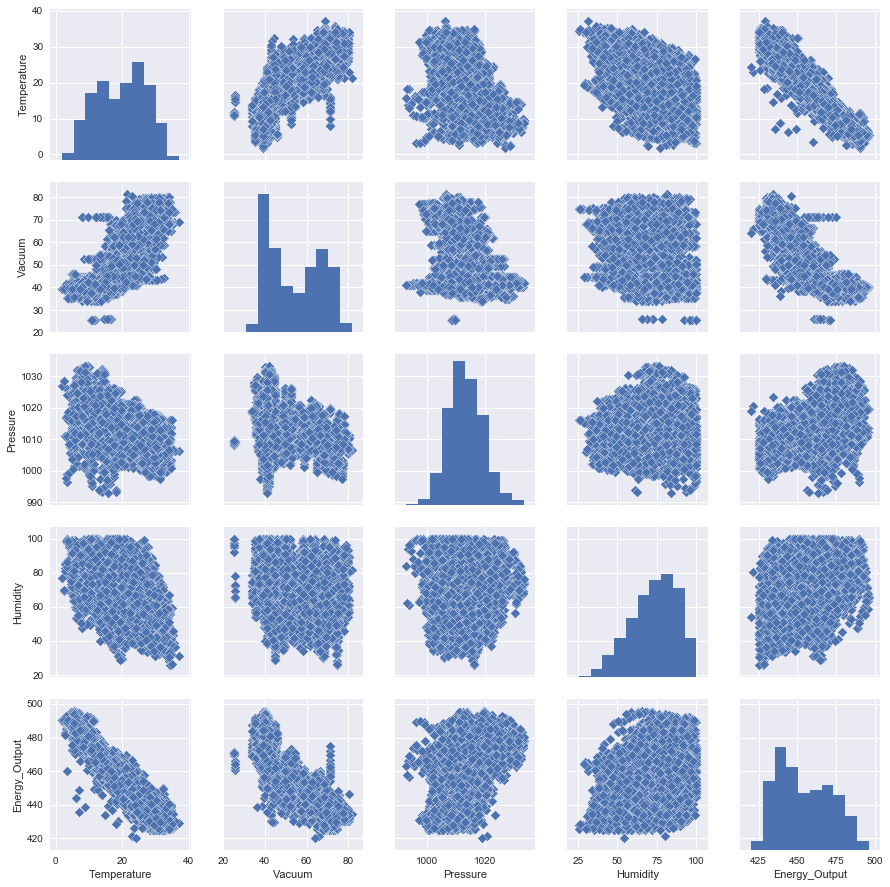

In [246]:
#1.(b).ii

## creating scatterplot 
sns.pairplot(df, kind="scatter", markers=["D"], palette="Set3")
plt.show()

Looking at the scatterplots for each pair of variables, the only evident relationship visible is between Temperature and Energy Output which is close to a linear relationship (with few outliers).

Also, Exhaust Vacuum and Energy Output resembles a weak linear relationship.

One more weak relationship can be figured out between Temperature and Exhaust Vacuum -  The temperature value increases as Exhaust Vacuum increases. 

In [250]:
## 1.(b).iii
def describe_new(df):
    df_func = df.describe()
    df_func.loc["range"] = df_func.loc['max'] - df_func.loc['min']
    df_func.loc["interquartile"] = df_func.loc['75%'] -  df_func.loc['25%']
    return df_func

df_table_stats=(describe_new(df))
df_table_stats

,Temperature,Vacuum,Pressure,Humidity,Energy_Output
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000
range,35.300000,56.200000,40.410000,74.600000,75.500000
interquartile,12.210000,24.800000,8.160000,21.502500,28.680000


###### Note: 50% is nothing but median here. #################

In [251]:
##1.(c)

import statsmodels.api as smf

#### simple linear model with temperature
Model_Temperature =  smf.OLS(df['Energy_Output'], smf.add_constant(df['Temperature'])).fit()
print(Model_Temperature.summary())
print("------------------------------------------------------------------------------------------------------------\n")
#print(Model_Temperature.params[1])
#<span class="n">est</span><span class="o">.</span><span class="n">params</span>

Model_Vacuum =  smf.OLS(df['Energy_Output'], smf.add_constant(df['Vacuum'])).fit()
print(Model_Vacuum.summary())
print("------------------------------------------------------------------------------------------------------------\n")

Model_Pressure =  smf.OLS(df['Energy_Output'], smf.add_constant(df['Pressure'])).fit()
print(Model_Pressure.summary())
print("------------------------------------------------------------------------------------------------------------\n")

Model_Humidity =  smf.OLS(df['Energy_Output'], smf.add_constant(df['Humidity'])).fit()
print(Model_Humidity.summary())
print("------------------------------------------------------------------------------------------------------------\n")

Univariate_regression_coefficients=[]
Univariate_regression_coefficients=[Model_Temperature.params[1],Model_Vacuum.params[1],Model_Pressure.params[1],Model_Humidity.params[1]]
Univariate_regression_coefficients

                            OLS Regression Results                            
Dep. Variable:          Energy_Output   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        21:40:37   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         497.0341      0.156   3177.280      

[-2.1713199585178002,
 -1.1681351265557094,
 1.4898716733991142,
 0.455650102262979]

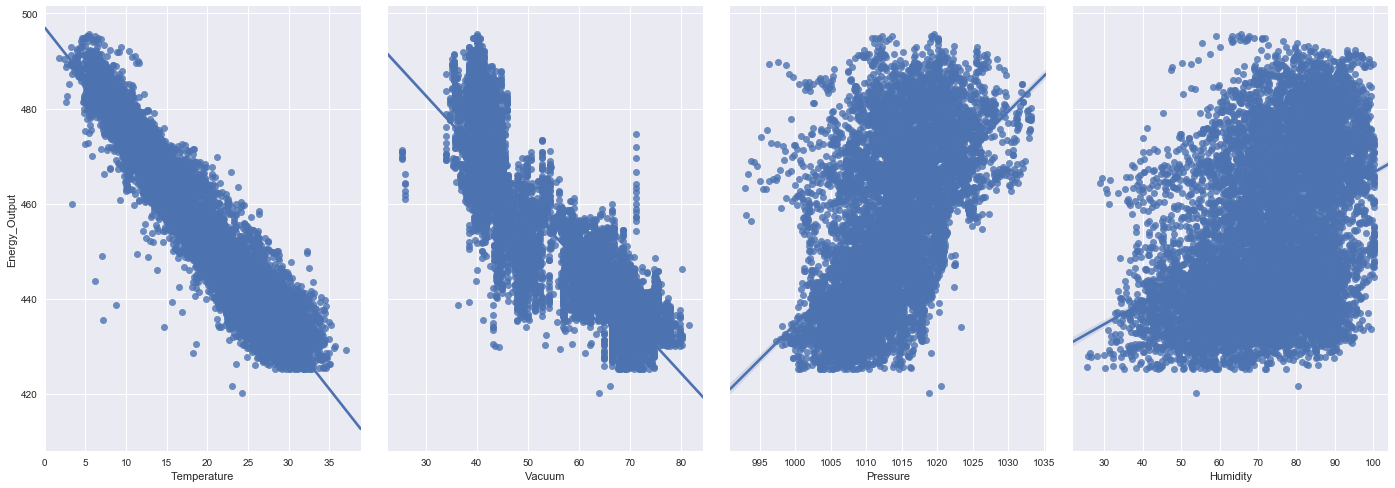

In [252]:
sns.pairplot(df, x_vars=['Temperature','Vacuum','Pressure','Humidity'], y_vars='Energy_Output', size=7, aspect=0.7, kind='reg')

### Observations:

p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response.

Here, all the 4 models for each feature has a p value much less than 0.05 and hence are strong associated with the response variable.

Humidity and Pressure alone as predictors have poor R squared values.

To evaluate the overall fit of a linear model, we use the R-squared value

R-squared is the proportion of variance explained

Based on t significance and coeff absolute value, the association with the target decreases in the following order:
### Temperature > Vacuum > Pressure >  Humidity.

None of the outliers are too significant to be removed and wont make much overall impact on the accuracy of the model. So we can safely avoid dealing with outliers in this dataset.

In [254]:
## 1.(d)

import statsmodels.formula.api as sm

Multiple_regression_model = sm.ols(formula='Energy_Output ~ Temperature + Vacuum + Pressure + Humidity', data=df).fit()

print(Multiple_regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Energy_Output   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        22:04:10   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     454.6093      9.749     46.634      

### observations

The p value for each of the predictors in this multiple linear models are way less than 0.05 and so we can reject null hypothesis for all.

Also, R squared value is very close to 1, showing well fit model.

In [255]:
### multivariate model using sklearn

from sklearn import linear_model

In [256]:
X=df[['Temperature','Vacuum','Pressure','Humidity']]
y=df['Energy_Output']
lm = linear_model.LinearRegression()
model = lm.fit(X,y)
print('Intercept: \n', model.intercept_)
Multivariate_coeff_list = model.coef_
print('Coefficients: \n', model.coef_)

Intercept: 
 454.6092743153102
Coefficients: 
 [-1.97751311 -0.23391642  0.06208294 -0.1580541 ]


As we can see multiple linear regression model delivers almost same coefficients and intercepts using both OLS from Statsmodel and LinearRegression() from sklearn

In [259]:
## 1.e

Multivariate_regression_coefficients =Multivariate_coeff_list.tolist()
print("Multivariate regression coefficients=" ,Multivariate_regression_coefficients)

print("Univariate regression coefficients=",Univariate_regression_coefficients)

index = ['Temperature','Vacuum','Pressure','Humidity']
df_plot = pd.DataFrame({'Multi':Multivariate_regression_coefficients,'Uni':Univariate_regression_coefficients,'index':index})
df_plot

Multivariate regression coefficients= [-1.9775131066353961, -0.2339164225824992, 0.06208294378085628, -0.15805410291641417]
Univariate regression coefficients= [-2.1713199585178002, -1.1681351265557094, 1.4898716733991142, 0.455650102262979]


,Multi,Uni,index
0,-1.977513,-2.171320,Temperature
1,-0.233916,-1.168135,Vacuum
2,0.062083,1.489872,Pressure
3,-0.158054,0.455650,Humidity


## observation

We can see that significance of coeff of Temperature and Vacuum still remains the same in multilinear model. However, for Pressure, coefficient value decreases more compared to Humidity in a multi model.

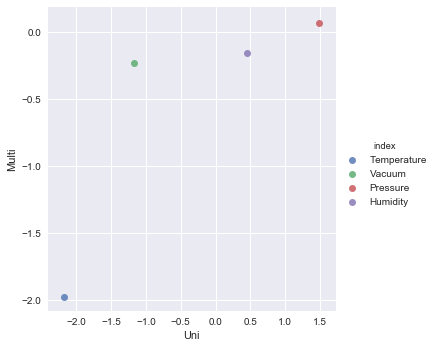

In [258]:
import matplotlib.pyplot as plt
#plt.style.use('seaborn')
import seaborn as sns; sns.set()

sns.lmplot(x="Uni", y="Multi", hue="index", data=df_plot,fit_reg=False)

In [260]:
## 1.f

model_temp_poly = sm.ols(formula = 'Energy_Output ~ Temperature + I(Temperature**2)+I(Temperature**3)', data = df).fit()
print(model_temp_poly.summary())
print("------------------------------------------------------------------------------------------------------------\n")

model_vacuum_poly = sm.ols(formula = 'Energy_Output ~ Vacuum + I(Vacuum**2)+I(Vacuum**3)', data = df).fit()
print(model_vacuum_poly.summary())
print("------------------------------------------------------------------------------------------------------------\n")

model_pressure_poly = sm.ols(formula = 'Energy_Output ~ Pressure + I(Pressure**2)+I(Pressure**3)', data = df).fit()
print(model_pressure_poly.summary())
print("------------------------------------------------------------------------------------------------------------\n")

model_humidity_poly = sm.ols(formula = 'Energy_Output ~ Humidity + I(Humidity**2)+I(Humidity**3)', data = df).fit()
print(model_humidity_poly.summary())
print("------------------------------------------------------------------------------------------------------------\n")

                            OLS Regression Results                            
Dep. Variable:          Energy_Output   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        22:13:06   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             492.7281    

KeyError: 'Humidity+Temperature'

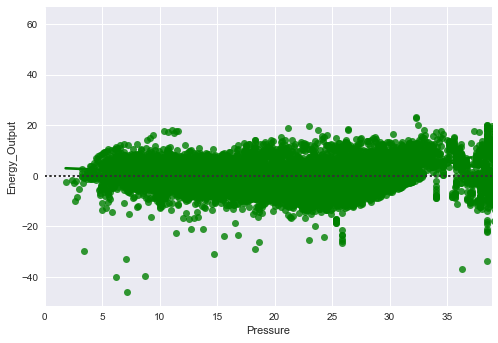

In [267]:
## plot these models to understand the association
sns.residplot('Temperature', 'Energy_Output',data=df, lowess=True, color="g")
sns.residplot('Vacuum', 'Energy_Output',data=df, lowess=True, color="g")
sns.residplot('Pressure', 'Energy_Output',data=df, lowess=True, color="g")
sns.residplot('Humidity', 'Energy_Output',data=df, lowess=True, color="g")


In [269]:
## 1.g

from sklearn.preprocessing import PolynomialFeatures



In [270]:
X=df[['Temperature','Vacuum','Pressure','Humidity']]
y=df['Energy_Output']
poly = PolynomialFeatures(interaction_only=True,include_bias = False)

X=poly.fit_transform(X)
print(poly.get_feature_names(['Temperature','Vacuum','Pressure','Humidity']))
print('\n\n')

#from patsy import dmatrices

interaction_model_ols = smf.OLS(y,smf.add_constant(X)).fit()
print(interaction_model_ols.summary())


['Temperature', 'Vacuum', 'Pressure', 'Humidity', 'Temperature Vacuum', 'Temperature Pressure', 'Temperature Humidity', 'Vacuum Pressure', 'Vacuum Humidity', 'Pressure Humidity']



                            OLS Regression Results                            
Dep. Variable:          Energy_Output   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        23:11:24   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std

### observations

As it can be seen that, Temperature-Vacuum and Vacuum-Humidity have very high p value, and these two interaction terms should be ignored.
Other interaction terms look significant.

In [271]:
interaction_model = linear_model.LinearRegression()
interaction_model.fit(X, y)

print('Intercept: \n', interaction_model.intercept_)
print('Coefficients: \n', interaction_model.coef_)

Intercept: 
 685.7824681478203
Coefficients: 
 [-4.34701412e+00 -7.67485763e+00 -1.52354642e-01  1.57090705e+00
  2.09709231e-02  1.75904518e-03 -5.23035364e-03  6.81235433e-03
  8.38633179e-04 -1.61179894e-03]


In [272]:
#1.h

from sklearn import linear_model
#from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split

In [273]:
y=df.Energy_Output
y

0       463.26
1       444.37
2       488.56
3       446.48
4       473.90
5       443.67
6       467.35
7       478.42
8       475.98
9       477.50
10      453.02
11      453.99
12      440.29
13      451.28
14      433.99
15      462.19
16      467.54
17      477.20
18      459.85
19      464.30
20      468.27
21      495.24
22      483.80
23      443.61
24      436.06
25      443.25
26      464.16
27      475.52
28      484.41
29      437.89
         ...  
9538    484.45
9539    472.32
9540    443.71
9541    433.71
9542    475.34
9543    439.06
9544    436.21
9545    448.55
9546    432.00
9547    484.22
9548    451.49
9549    465.89
9550    481.03
9551    435.38
9552    484.33
9553    445.79
9554    443.21
9555    439.59
9556    433.97
9557    451.06
9558    445.30
9559    454.20
9560    444.86
9561    465.45
9562    467.32
9563    460.03
9564    469.62
9565    429.57
9566    435.74
9567    453.28
Name: Energy_Output, Length: 9568, dtype: float64

In [274]:
X=df[['Temperature','Vacuum','Pressure','Humidity']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(6697, 4) (6697,)
(2871, 4) (2871,)


In [275]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

plot for train predictions


Text(0,0.5,'Predictions')

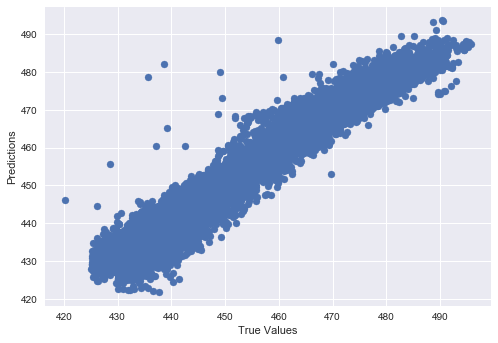

In [279]:
predictions_train = lm.predict(X_train)
## The line / model
print("plot for train predictions")
plt.scatter(y_train, predictions_train)
plt.xlabel('True Values')
plt.ylabel('Predictions')

plot for test predictions


Text(0,0.5,'Predictions')

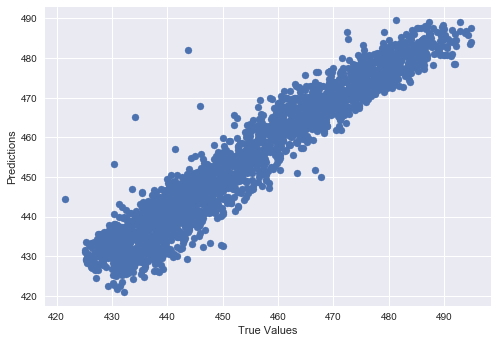

In [280]:
## The line / model
print("plot for test predictions")
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [281]:
print ("Score for test data:", model.score(X_test, y_test))
print("Accuracy for test data:", (model.score(X_test,y_test)*100),"percentage")

print("mean squared error for test:",mean_squared_error(y_test, predictions))

## add train mean error
print("mean squared error for train data:",mean_squared_error(y_train, predictions_train))


Score for test data: 0.9292882010768408
Accuracy for test data: 92.92882010768409 percentage
mean squared error for test: 20.87022590746972
mean squared error for train data: 20.72933092282152


## observation

Having MSE for both train and test almost similar shows that model is fitted well.
Now when we perform linear model with all the interaction terms and quadratic non linearities, MSE will reduce.

In [282]:
X=df[['Temperature','Vacuum','Pressure','Humidity']]
y=df['Energy_Output']
poly = PolynomialFeatures(degree=3,include_bias = False)

X=poly.fit_transform(X)
print(poly.get_feature_names(['Temperature','Vacuum','Pressure','Humidity']))
print('\n\n')

#from patsy import dmatrices

interaction_model_ols = smf.OLS(y,smf.add_constant(X)).fit()
print(interaction_model_ols.summary())

interaction_model = linear_model.LinearRegression()
interaction_model.fit(X, y)

print('Intercept: \n', interaction_model.intercept_)
print('Coefficients: \n', interaction_model.coef_)

['Temperature', 'Vacuum', 'Pressure', 'Humidity', 'Temperature^2', 'Temperature Vacuum', 'Temperature Pressure', 'Temperature Humidity', 'Vacuum^2', 'Vacuum Pressure', 'Vacuum Humidity', 'Pressure^2', 'Pressure Humidity', 'Humidity^2', 'Temperature^3', 'Temperature^2 Vacuum', 'Temperature^2 Pressure', 'Temperature^2 Humidity', 'Temperature Vacuum^2', 'Temperature Vacuum Pressure', 'Temperature Vacuum Humidity', 'Temperature Pressure^2', 'Temperature Pressure Humidity', 'Temperature Humidity^2', 'Vacuum^3', 'Vacuum^2 Pressure', 'Vacuum^2 Humidity', 'Vacuum Pressure^2', 'Vacuum Pressure Humidity', 'Vacuum Humidity^2', 'Pressure^3', 'Pressure^2 Humidity', 'Pressure Humidity^2', 'Humidity^3']



                            OLS Regression Results                            
Dep. Variable:          Energy_Output   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:          

In [283]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(6697, 34) (6697,)
(2871, 34) (2871,)


In [284]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [287]:
prediction_train = lm.predict(X_train)

Text(0,0.5,'Predictions')

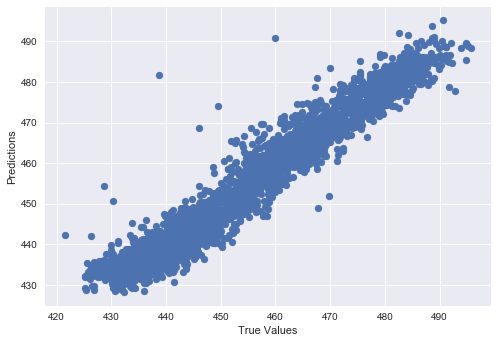

In [285]:
## The line / model
print("Plot for test values vs predictions")
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

plot for train values vs predictions


Text(0,0.5,'Predictions')

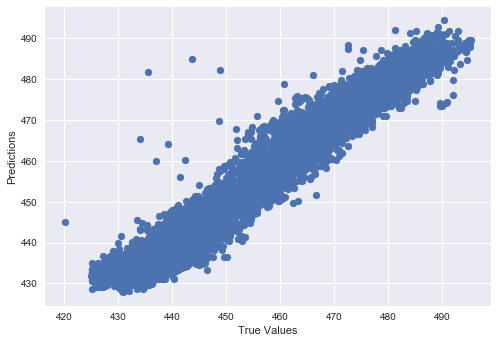

In [291]:
## The line / model
print("plot for train values vs predictions")
plt.scatter(y_train, prediction_train)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [292]:
print ("Score for test data:", model.score(X_test, y_test))
print("Accuracy for test data:", (model.score(X_test,y_test)*100),"percentage")

from sklearn.metrics import mean_squared_error
print("mean squared error for test:",mean_squared_error(y_test, predictions))
print("mean squared error for train:",mean_squared_error(y_train, prediction_train))

Score for test data: 0.9411484736202494
Accuracy for test data: 94.11484736202495 percentage
mean squared error for test: 17.145505955043376
mean squared error for train: 17.288369981792254


### pairwise interaction and polynomial interaction reduced the MSE for both train and test significantly

It looks like that adding up quadratic non linearites and 3 paired interaction terms between predictors (for eg. Pressure-Humidity-Humidity) significantly reduces both MSEs of Test and train models.

In [294]:
## 1.i
X=df[['Temperature','Vacuum','Pressure','Humidity']]
y=df['Energy_Output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

mse_error_list_test_data = []
mse_error_list_train_data=[]
from sklearn.neighbors import KNeighborsRegressor
for i in range(1,101):  
    KNN_regressor = KNeighborsRegressor(n_neighbors=i)
    KNN_regressor.fit(X_train, y_train)
   # knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    #print("value of i",i)
    #knn.fit(train_independent, train_dependent)
    prediction_knn_test = KNN_regressor.predict(X_test)
    prediction_knn_train = KNN_regressor.predict(X_train)
    mse_error_list_test_data.append(mean_squared_error(y_test, prediction_knn_test))
    mse_error_list_train_data.append(mean_squared_error(y_train, prediction_knn_train))
    #accuracy_list.append(metrics.accuracy_score(test_data_labels,prediction_i))
print("MSE value for k from 1 to 100 is",mse_error_list_test_data)
print ("-------------------------------------------------------------------------------------------\n")
print("lowest MSE with raw data: ", min(mse_error_list_test_data), "for test data is for k :", mse_error_list_test_data.index(min(mse_error_list_test_data))+1)

print("MSE value for k from 1 to 100 for train is",mse_error_list_train_data)
print ("-------------------------------------------------------------------------------------------\n")
print("lowest MSE with raw data train: ", min(mse_error_list_train_data), "for train data is for k :", mse_error_list_train_data.index(min(mse_error_list_train_data))+1)

(7654, 4) (7654,)
(1914, 4) (1914,)
MSE value for k from 1 to 100 is [20.73361499477534, 17.438087395506788, 16.638309363752466, 16.154536660788924, 15.775886566353186, 15.73867410745385, 15.865446525067707, 16.099126764955596, 16.4447671136654, 16.58889652507839, 16.831615402817015, 17.024477026732857, 17.286784962252618, 17.31491579793361, 17.42918408986417, 17.550542472203176, 17.634097702957263, 17.686547180618447, 17.721289452698734, 17.878204308777438, 17.966144947362434, 18.09255287766523, 18.133169932523856, 18.289359524029816, 18.314146019644724, 18.44274244673319, 18.48083975357377, 18.568331791791955, 18.669325213428298, 18.795539575119, 18.813508086045417, 18.903242375567363, 19.004534664974035, 19.058615171988944, 19.13100661612607, 19.164474713208065, 19.20521564192336, 19.2633866932169, 19.360272257534177, 19.379232985370955, 19.39721585626932, 19.42919863960387, 19.458174438666894, 19.531367424863127, 19.614268255505248, 19.655255792879252, 19.688462021047183, 19.744324

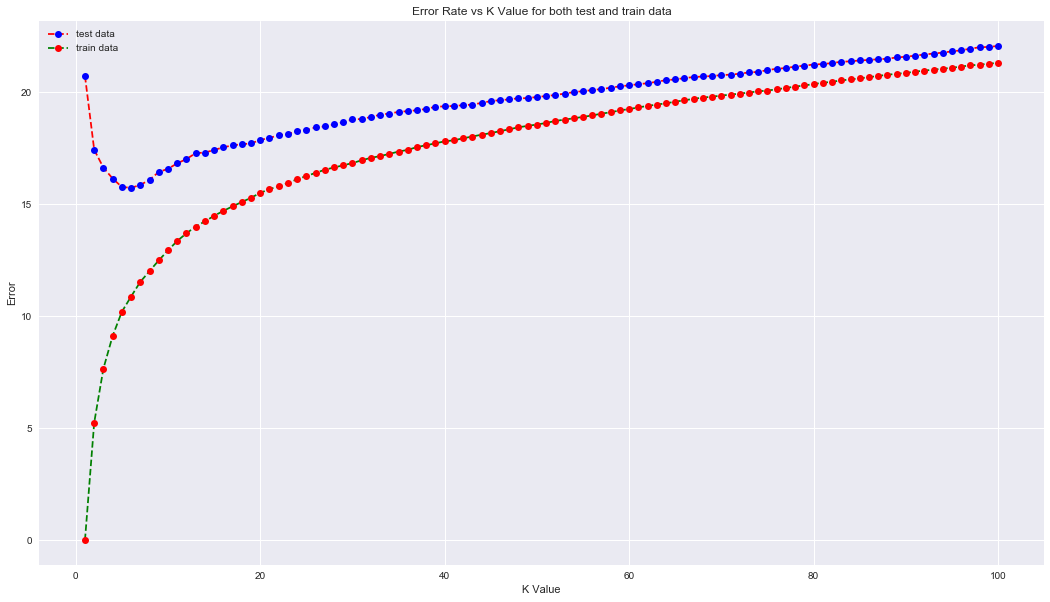

In [298]:
plt.figure(figsize=(18, 10))  
plt.plot(range(1,101), mse_error_list_test_data, color='red', linestyle='dashed', marker='o', label='test data' ,
         markerfacecolor='blue', markersize=7)
plt.title('Error Rate vs K Value for both test and train data')  
plt.xlabel('K Value')  
plt.ylabel('Error') 

plt.plot(range(1,101), mse_error_list_train_data, color='green', linestyle='dashed', marker='o',  label = 'train data',
         markerfacecolor='red', markersize=7)
plt.legend()

In [ ]:
### now running knn regressor on normalized data

from sklearn.preprocessing import Normalizer
from sklearn import preprocessing

In [299]:
X=df[['Temperature','Vacuum','Pressure','Humidity']]
normalized_df = preprocessing.normalize(X)
normalized_df


X_train, X_test, y_train, y_test = train_test_split(normalized_df, y, test_size=0.3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(6697, 4) (6697,)
(2871, 4) (2871,)


In [300]:
## 1.i
mse_error_list_test_data_normalized = []
from sklearn.neighbors import KNeighborsRegressor
for i in range(1,101):  
    KNN_regressor_normal = KNeighborsRegressor(n_neighbors=i)
    KNN_regressor_normal.fit(X_train, y_train)
   # knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    #print("value of i",i)
    #knn.fit(train_independent, train_dependent)
    prediction_knn_test_normal = KNN_regressor_normal.predict(X_test)
    mse_error_list_test_data_normalized.append(mean_squared_error(y_test, prediction_knn_test_normal))
    #accuracy_list.append(metrics.accuracy_score(test_data_labels,prediction_i))
print("MSE value for k from 1 to 100 for normalized data is",mse_error_list_test_data_normalized)
print ("-------------------------------------------------------------------------------------------\n")
print("lowest MSE with raw data: ", min(mse_error_list_test_data_normalized), "for test data is for k :", mse_error_list_test_data_normalized.index(min(mse_error_list_test_data_normalized))+1)

MSE value for k from 1 to 100 for normalized data is [27.747346952281426, 21.855703030303022, 19.895550470219426, 18.947323184430505, 18.36147391431556, 18.15943633170787, 18.126610214033356, 17.9409428628962, 17.863954923436143, 17.778797800417966, 17.82534232435497, 17.879825093608492, 17.942366157803296, 18.052686773256852, 18.032142209373436, 18.124317105456505, 18.219222632843163, 18.207879224772203, 18.30722318330888, 18.348452103883663, 18.386878610643144, 18.36764908640408, 18.478797365612312, 18.510381240022337, 18.48560647685125, 18.536920715366257, 18.598334641959053, 18.679578762777307, 18.6770678990487, 18.723254580517814, 18.82323872928574, 18.943898466684626, 18.991730140773168, 19.04727668707719, 19.089163489191705, 19.078556604411506, 19.106881373977554, 19.19095311783901, 19.230763336853073, 19.263510300635662, 19.301282216946795, 19.321656725219984, 19.40328608073989, 19.435071621440255, 19.491006931331196, 19.531111600392165, 19.55968717259544, 19.60357594084705, 19

### with regression using KNN, after normalization of data, results improved while in linear model, interaction term improved the result
. This is clear that in KNN type of implementation, normalization plays an important role. whereas in linear relations, interaction sometimes
prove to be very important.

############## ISLR 2.4.1 ########################################################

For each of parts (a) through (d), indicate whether we would generally
expect the performance of a flexible statistical learning method to be
better or worse than an inflexible method. Justify your answer.
(a) The sample size n is extremely large, and the number of predictors
p is small.
(b) The number of predictors p is extremely large, and the number
of observations n is small.
(c) The relationship between the predictors and response is highly
non-linear.
(d) The variance of the error terms, i.e. σ2 = Var(), is extremely
high.

#### Answers ####

a. Better : Large n datasets have less chances of overfitting. Overfitting is the key problem faced by flexible model. As this is overcome due to large n dataset, flexible model would fit better and would be able to capture more patterned results and more information.

b.Worse : Small n means data can lead to overfitting easily in case of flexible model. And this overfitting by flexible model will contain a lot of noise and n is low. Inflexible model on the other hand will have less noise and hence should be preferred in this scenario.

c. Better : This is an example of non-linear data. Inflexible models perform bad in such scenarios as they fail to capture non linearity. With increased degrees of freedom, flexible model will perform better. 

d. Worse: Variance of error term being high resembles that model has lots of noise involved. As noise will lead to overfitting if we use flexible model, so we should avoid it and stick to inflexible model.

############## ISLR 2.4.7  #######################################################

The table below provides a training data set containing six observations,
three predictors, and one qualitative response variable.
Obs. X1 X2 X3 Y
1 0 3 0 Red
2 2 0 0 Red
3 0 1 3 Red
4 0 1 2 Green
5 −1 0 1 Green
6 1 1 1 Red
Suppose we wish to use this data set to make a prediction for Y when
X1 = X2 = X3 = 0 using K-nearest neighbors.
(a) Compute the Euclidean distance between each observation and
the test point, X1 = X2 = X3 = 0.
54 2. Statistical Learning
(b) What is our prediction with K = 1? Why?
(c) What is our prediction with K = 3? Why?
(d) If the Bayes decision boundary in this problem is highly nonlinear,
then would we expect the best value for K to be large or
small? Why?

#### answers ##############